In [1]:
import cv2
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [16, 16]


TEST_FILES = [
    "/Users/chris/Dev/cod_records/aws/extracted/31829_B016711/31829_B016711-00000.jpg",
    "/Users/chris/Dev/cod_records/george circumstance of death.jpg"
]

[[[157 207 249]
  [152 202 244]
  [162 212 254]
  [169 219 255]]

 [[149 199 241]
  [143 193 235]
  [160 210 252]
  [167 217 255]]]


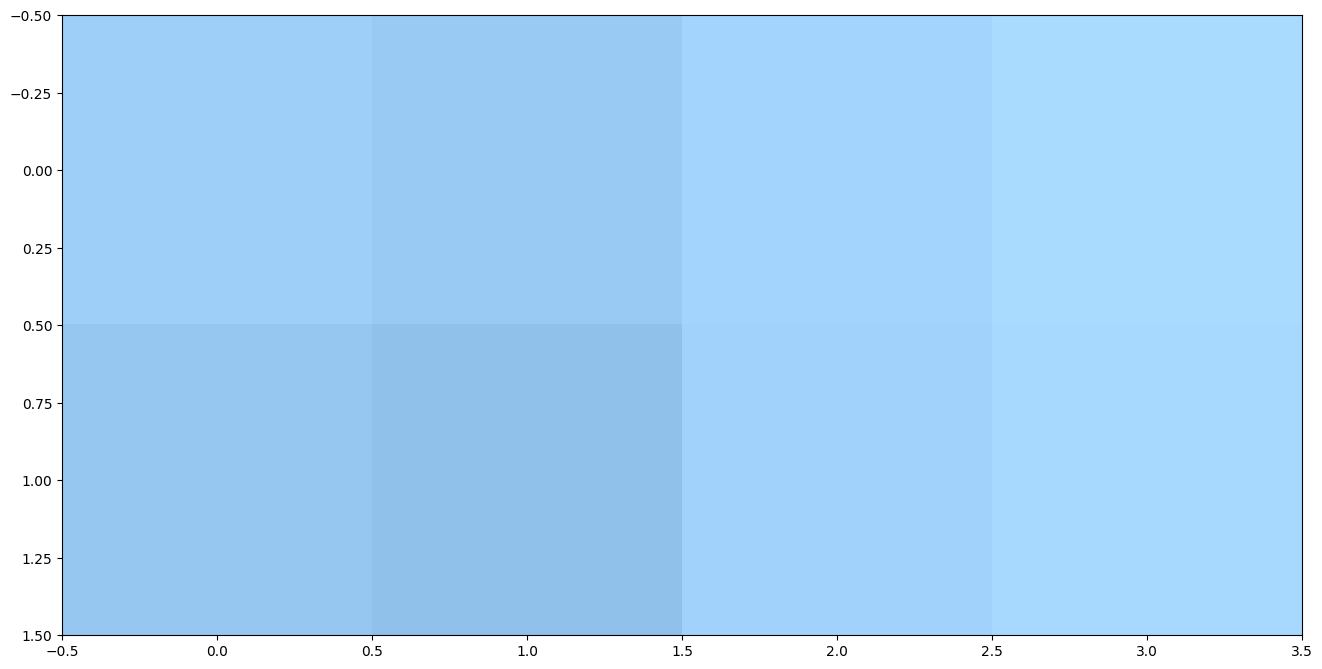

In [2]:
# Test thresholding theory

test = cv2.imread(TEST_FILES[0])[100:102, 100:104]
plt.imshow(test)
print(test)

[[214 209 219 224]
 [206 200 217 223]]


True

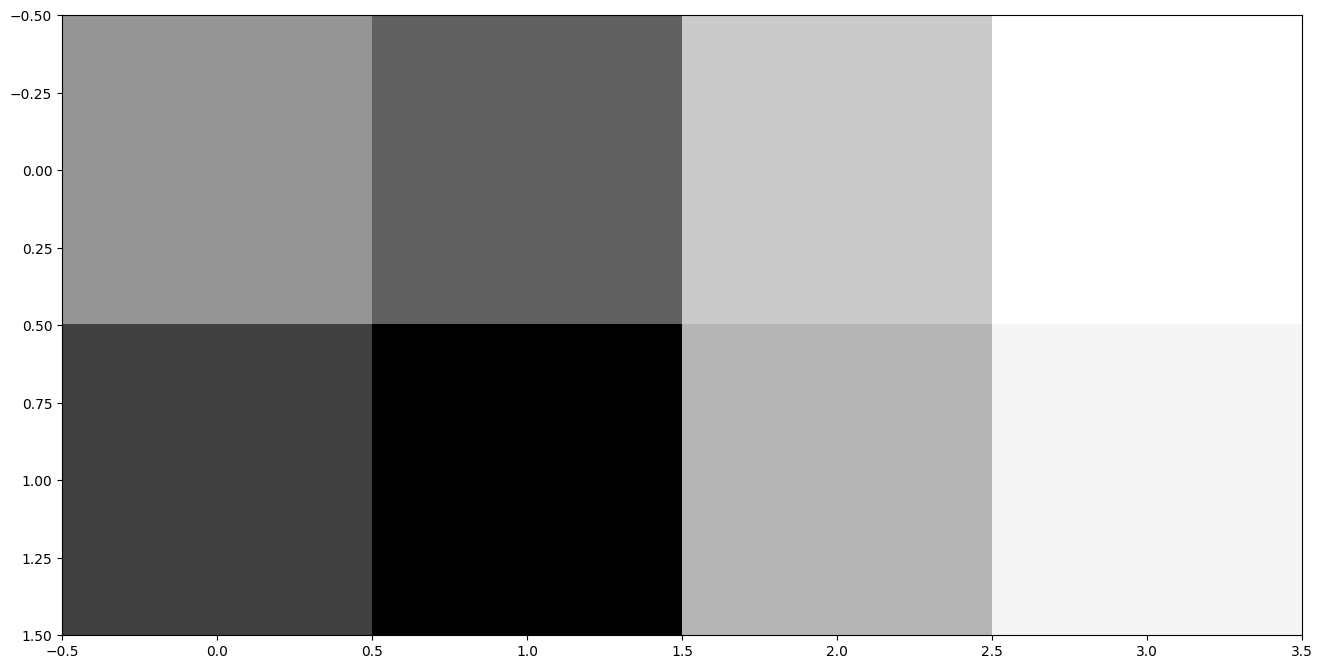

In [3]:
# matplotlib is "extrapolating" the values: lowest (200) -> black, highest (224) -> white

gray = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
print(gray)
cv2.imwrite('gray_test.bmp', gray)

In [4]:
# basic threshold (inverse)
thresh_val, thresh_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV)
print(thresh_val, thresh_img)

0.0 [[0 0 0 0]
 [0 0 0 0]]


[[214 209 219 224]
 [206 200 217 223]]
210.0 [[42  0 42 42]
 [ 0  0 42 42]]


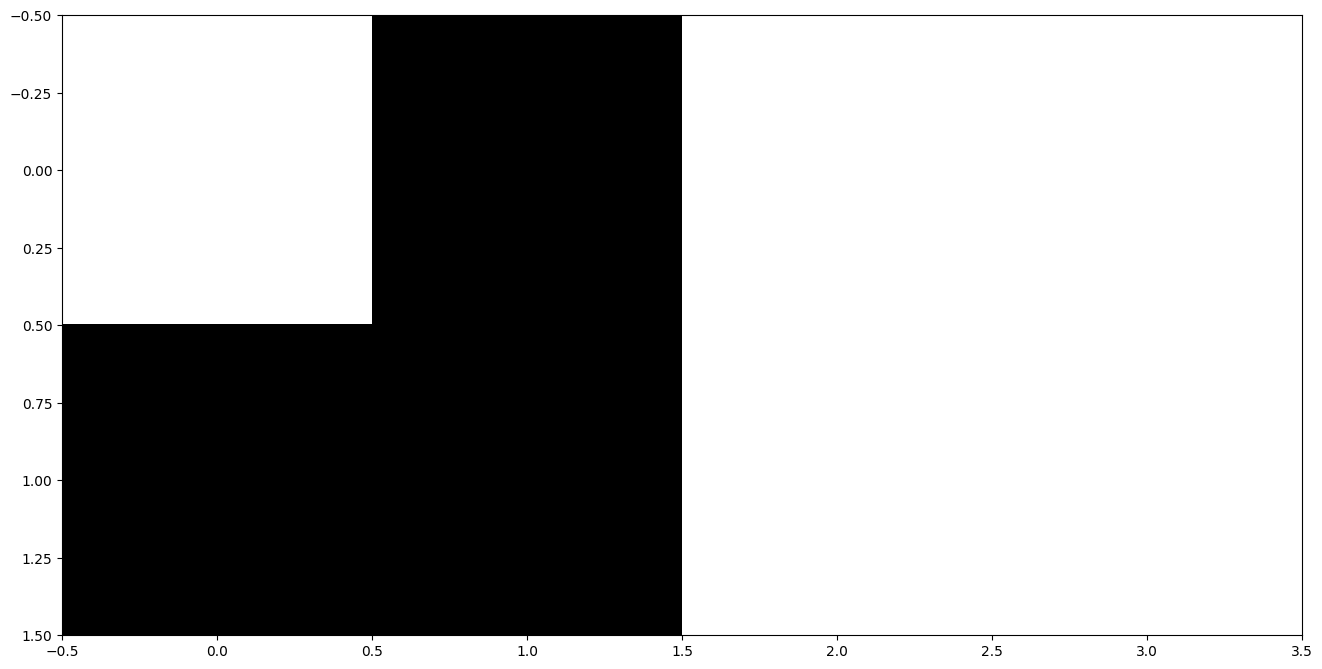

In [5]:
# basic functional threshold: returns 42 for pixels > 210
thresh_val, thresh_img = cv2.threshold(gray, 210, 42, cv2.THRESH_BINARY)
plt.imshow(thresh_img, cmap='gray')
print(gray)
print(thresh_val, thresh_img)

[[214 209 219 224]
 [206 200 217 223]]
210.0 [[ 0 42  0  0]
 [42 42  0  0]]


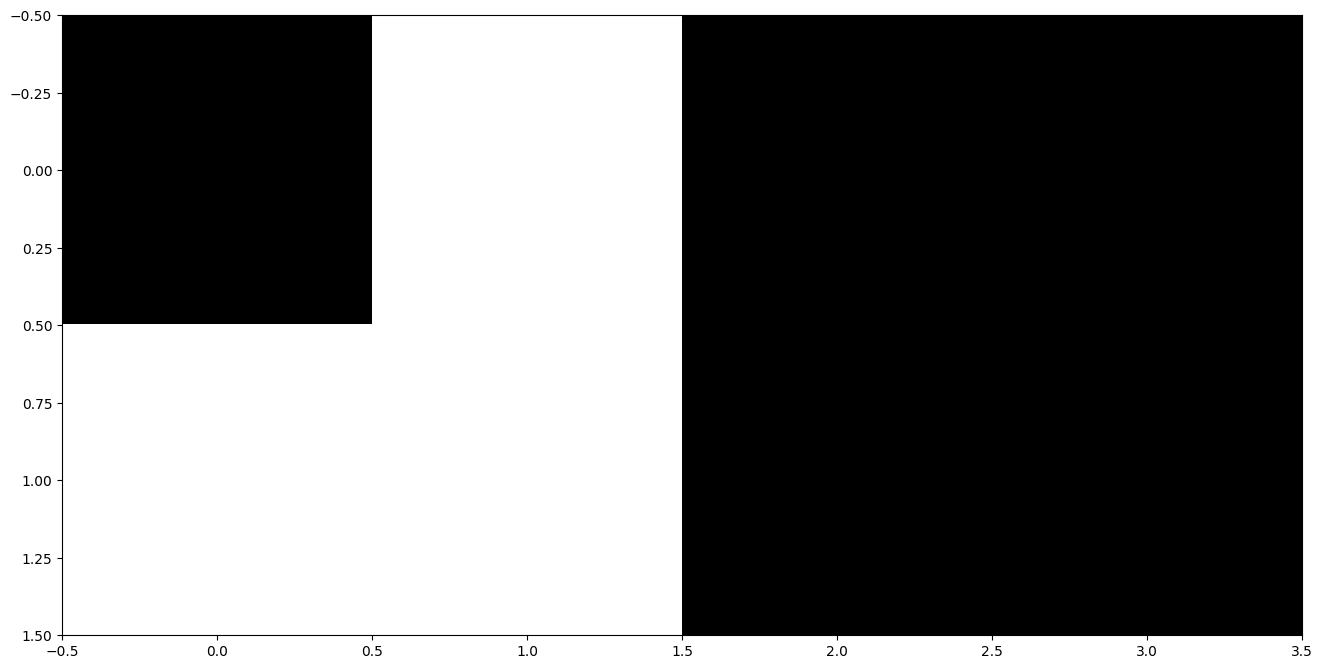

In [6]:
# basic functional threshold (inverse): returns 42 for pixels < 210
thresh_val, thresh_img = cv2.threshold(gray, 210, 42, cv2.THRESH_BINARY_INV)
plt.imshow(thresh_img, cmap='gray')
print(gray)
print(thresh_val, thresh_img)

[[214 209 219 224]
 [206 200 217 223]]
209.0 [[ 0 42  0  0]
 [42 42  0  0]]


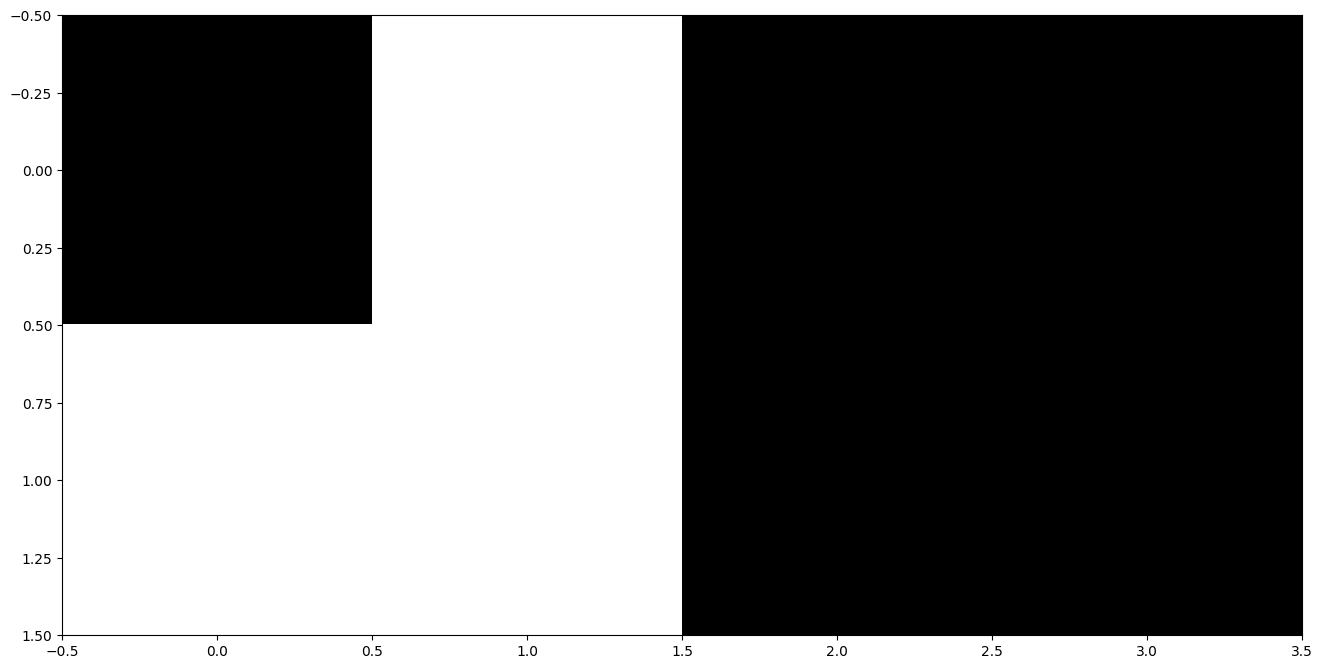

In [7]:
# Otsu threshold (inverse): returns 42 for pixels < value it picks, here 209
thresh_val, thresh_img = cv2.threshold(gray, 210, 42, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(thresh_img, cmap='gray')
print(gray)
print(thresh_val, thresh_img)